In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [2]:
# Load the Glass Identification Data Set csv data using the Pandas library
filename = 'dataset/glass.data'
df = pd.read_csv(filename, header=None, names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"])
# print(df)
print(df.shape)

(214, 11)


In [3]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
mean = []
std = []
median = []
range = []
corrcoef = []

for col in df:
    if col in ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]:
        mean.append(df[col].mean())
        std.append(df[col].std())
        median.append(df[col].median())
        range.append(df[col].max() - df[col].min())

        # correlation with the class
        # print(np.cov(df[col], df['Type']))
        corrcoef.append(np.corrcoef(df[col], df['Type'])[0][1])
        # correlation with the Refractive Index

df_stats = pd.DataFrame(np.array([mean, std, median, range, corrcoef]), columns=["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"], index=['mean', 'std', 'median', 'range', 'corrcoef'])
df_stats

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
median,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
range,0.022780,6.650000,4.490000,3.210000,5.600000,6.210000,10.760000,3.150000,0.510000
corrcoef,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278


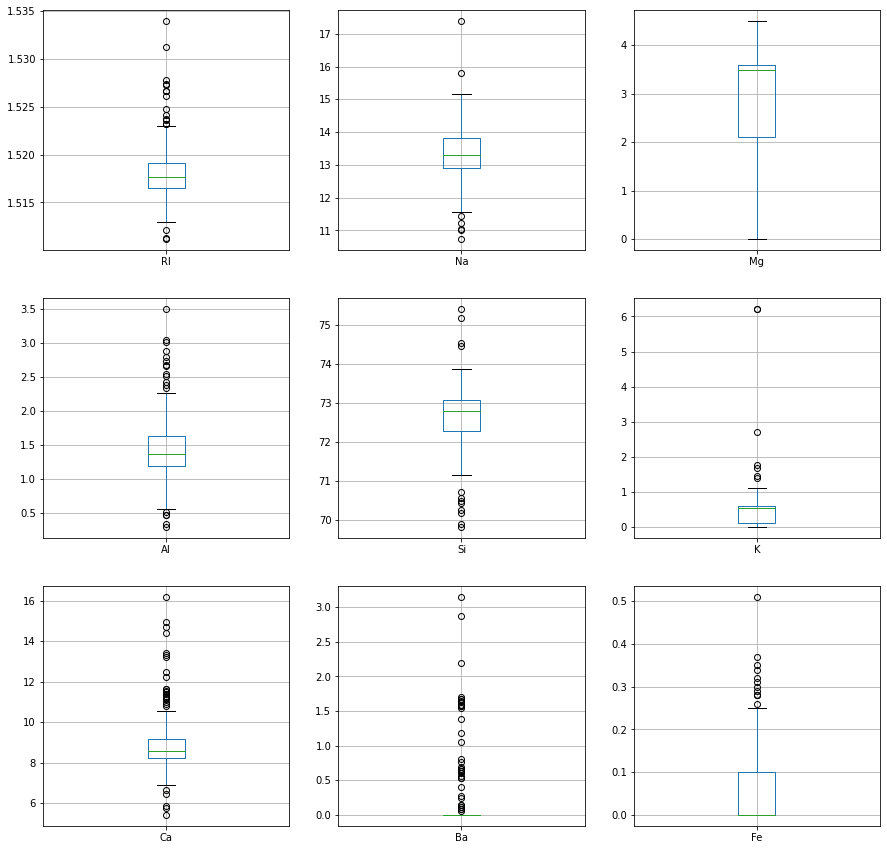

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]):
        boxplot = df.boxplot(column=col, ax=axs[int((i-(i%3))/3),i%3])

In [6]:
# Correlation coefficient
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


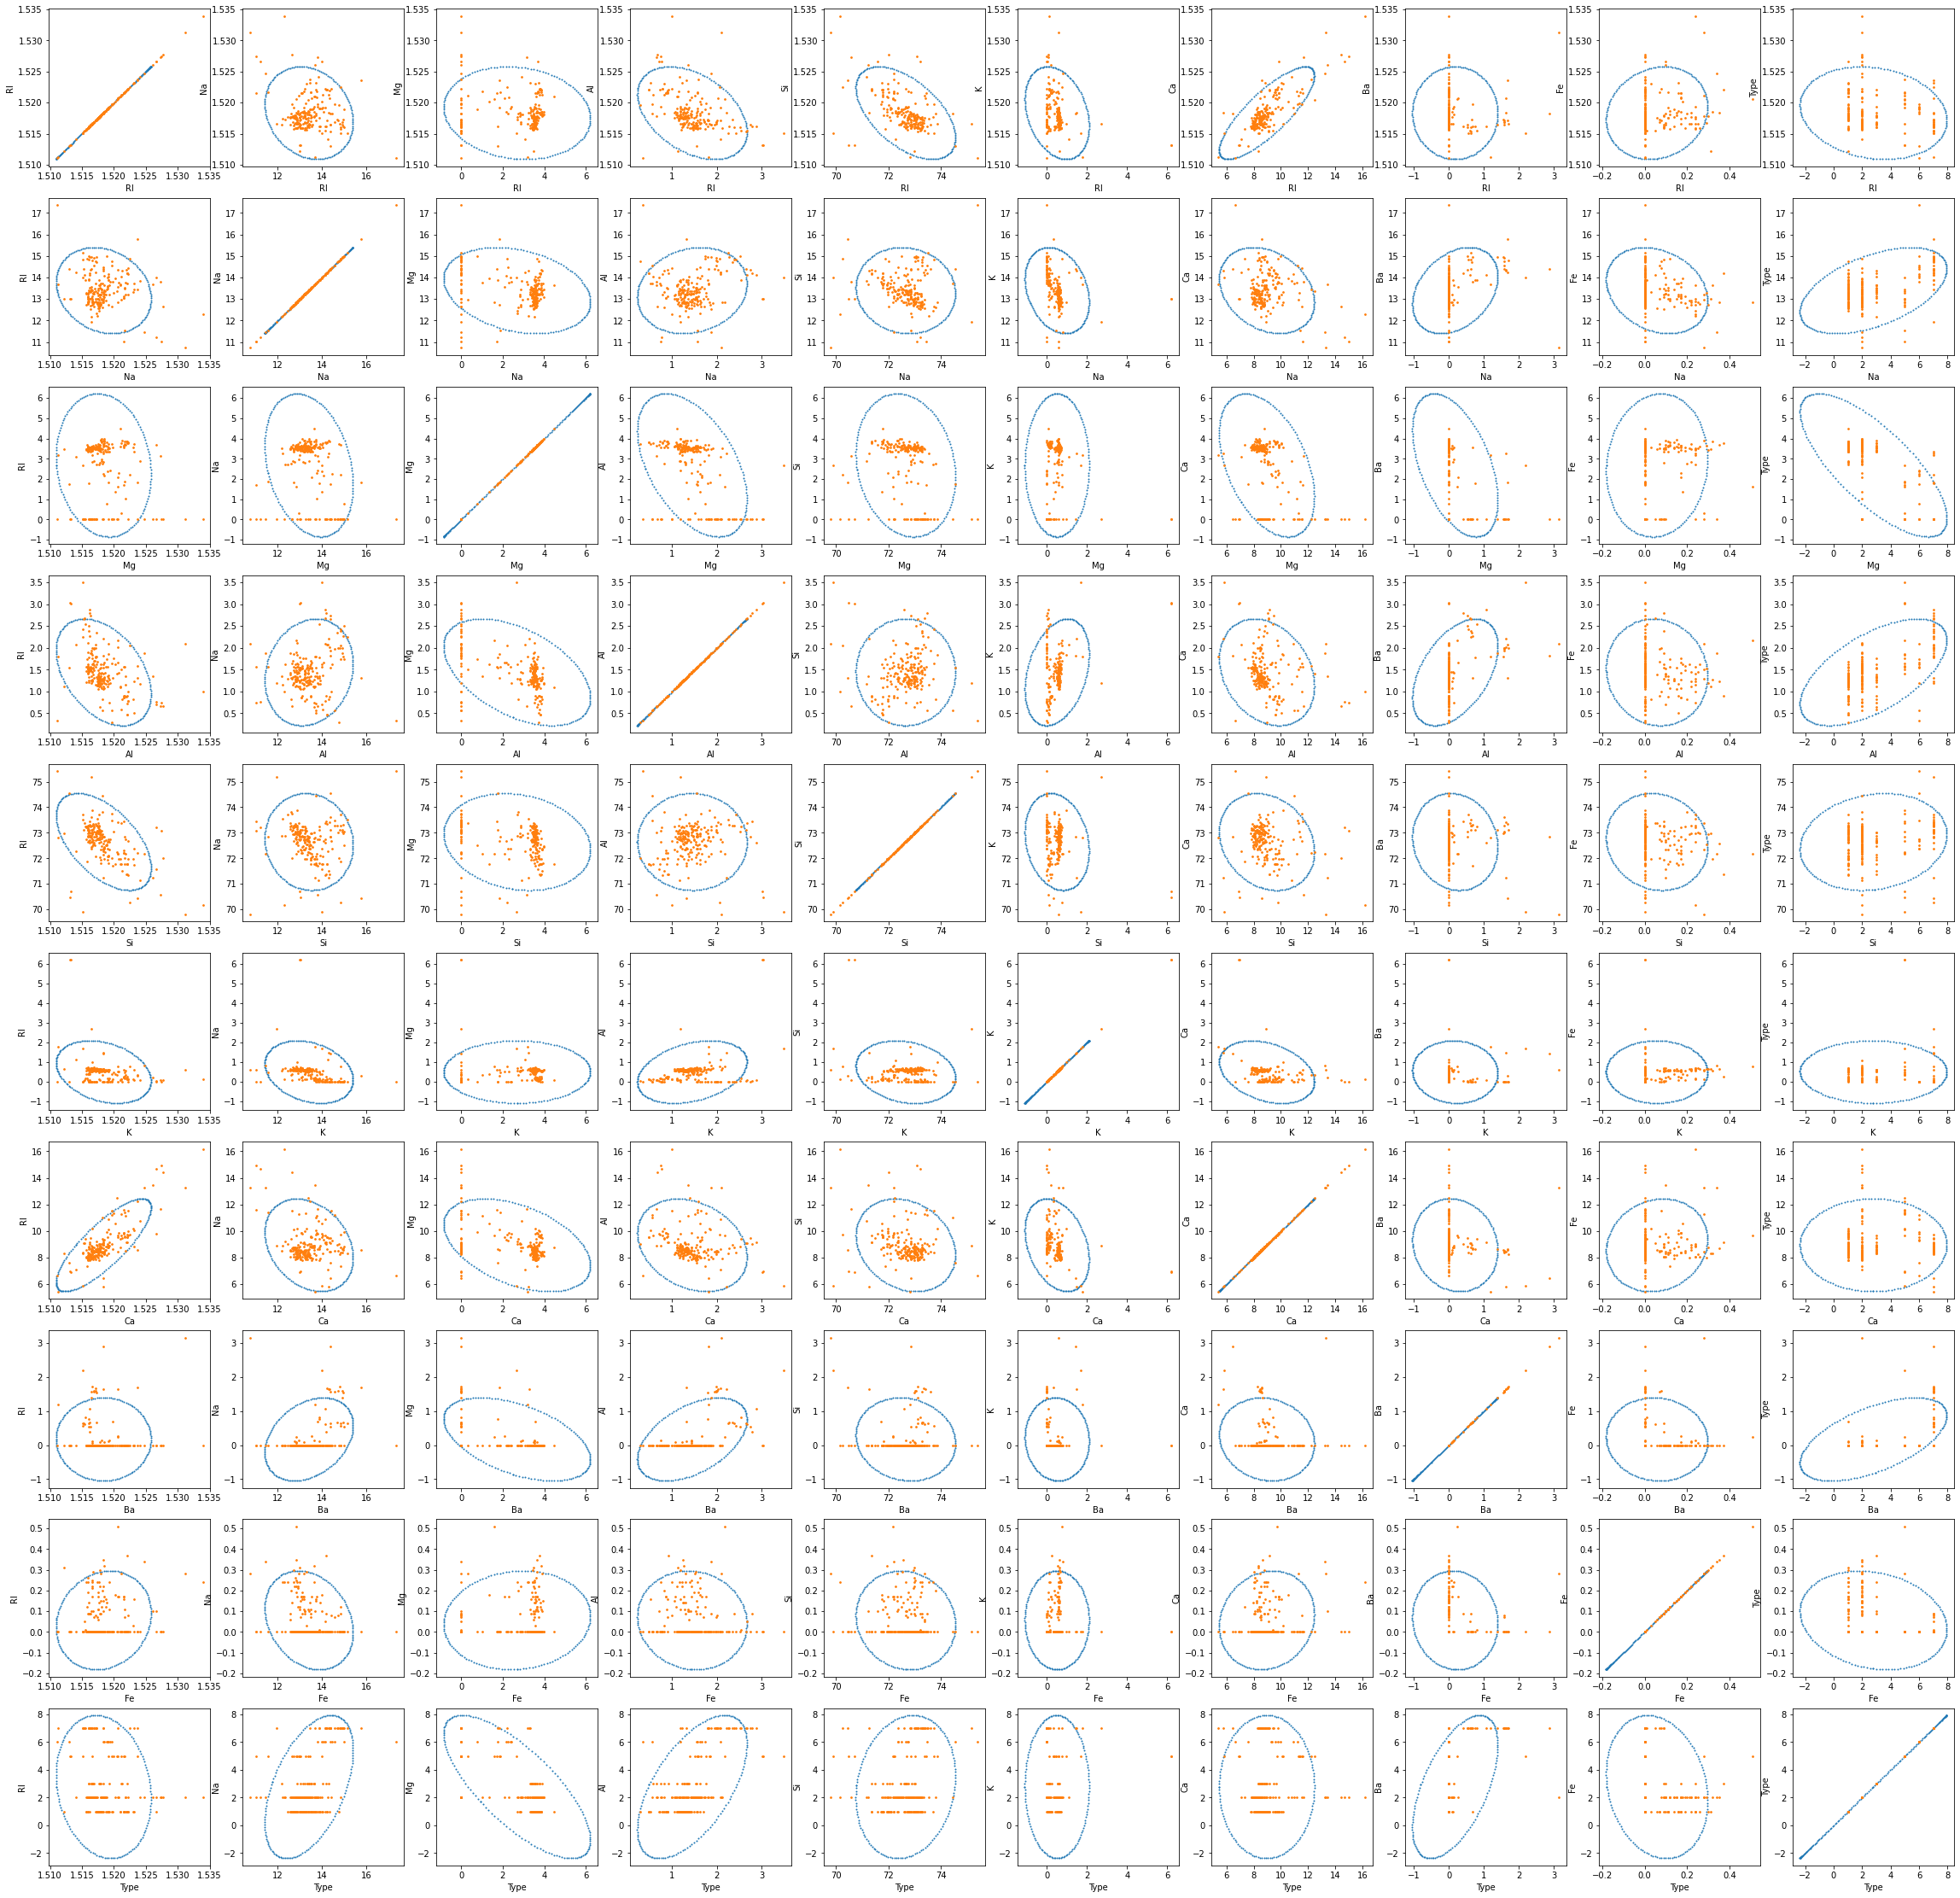

In [60]:
def plot_confidence_ellipse():
    def generate_elipse(cov, elipse_dots):
            (w, v) = np.linalg.eigh(cov * 6)
            t = np.linspace(0, math.pi*2, elipse_dots)
            circ = np.array([np.cos(t), np.sin(t)])
            elip = v @ np.diag(np.sqrt(w)) @ circ

            return elip

    def single_plot(x, y, i):
        cov = np.cov(x, y)

        elipse_dots = 150
            
        elipse = np.add(generate_elipse(cov, elipse_dots), np.array([x.mean(), y.mean()]).reshape((2,1)))
        

        ax[int((i-(i%size))/size),i%size].set_xlabel(col_1)
        ax[int((i-(i%size))/size),i%size].set_ylabel(col_2)
        ax[int((i-(i%size))/size),i%size].scatter(elipse[0,:], elipse[1,:], s=1)
        ax[int((i-(i%size))/size),i%size].scatter(x, y, s=3)

    
    size=10
    fig, ax = plt.subplots(size, size, figsize=(40, 40))
    
    i = 0
    for col_1 in ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]:
        for col_2 in ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]:
            
            single_plot(df[col_2], df[col_1], i)
            i+=1
    plt.show()

plot_confidence_ellipse()